I intend to evaluate the hypothesis that having foreign-born players on a team leads to better FIFA rankings in men’s football. I found two data sources: the first is a list of FIFA rankings from 1992-2019, the second is a list of foreign-born players who have played in FIFA world cups from 1930 until 2018.

Summary of wrangling steps performed previously:
1. Loaded the first csv file containing FIFA rankings as df1.

2. Eventually decided to focus on 3 df1 columns for the final statistical analysis: ‘rank’, ‘rank-date’ renamed to 
   'date' and ‘country-full’ renamed to 'country'.
   
3. Loaded the second file containing foreign-born players in FIFA world cup tournaments as df2.

4. I decided to focus on four df2 columns for statistical analysis: “NameFootballPlayer”, “'International” 
   (renamed to "country"), “FIFAWorldCup”(which contains the year the player participated in the tournament 
   therefore renamed to “date”). 
   
5. Performed an inner merge on df1 and df2 on the “country” column in each respective DataFrame. I then 
   dropped the extra date column from df2.
   
6. In an effort to minimize the number of rows in the merged dataframe(at this point numbering at about 2 
    million) I sliced the rows to only focus on dates from January 1994 onwards.

Summary of EDA and Inferential Statistics performed previously:
1. The merge process on df1 (about 60,000 rows) and df2 (about 10,000 rows) resulted in an inflated dataset with 
   over 1 million rows.
2. Performed a chi-square test of independence on the 'rank' column and the 'Foreign-born' column which resulted 
   in a p value of zero and a rejection of the Null hypothesis



In [32]:
import pandas as pd
import numpy as np
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [33]:
#Loading dataframe saved from data wrangling process
new_df = pd.read_csv('wrangled-dataframe', parse_dates = ['date_y'])

In [34]:
#Defining function to print out rows and columns of dataframe
def shape_df(df):
    print("This dataframe has {r} rows and {c} columns.".format(r = df.shape[0], c = df.shape[1]))

In [35]:
cols = ['rank', 'country', 'NameFootballPlayer', 'Foreign-born', 'date_y']
new_df = new_df[cols]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302239 entries, 0 to 1302238
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   rank                1302239 non-null  int64         
 1   country             1302239 non-null  object        
 2   NameFootballPlayer  1302239 non-null  object        
 3   Foreign-born        1302239 non-null  int64         
 4   date_y              1302239 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 49.7+ MB


In [36]:
new_df.head()

,rank,country,NameFootballPlayer,Foreign-born,date_y
0,1,Belgium,Michel Preud'homme,0,1994-01-01
1,1,Belgium,Dirk Medved,0,1994-01-01
2,1,Belgium,Vital Borkelmans,0,1994-01-01
3,1,Belgium,Philippe Albert,0,1994-01-01
4,1,Belgium,Rudi Smidts,0,1994-01-01


# Preprocessing

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [38]:
new_df['Foreign-born'] = new_df['Foreign-born'].astype("category")
new_df['country'] = new_df['country'].astype("category")
new_df['NameFootballPlayer'] = new_df['NameFootballPlayer'].astype('object')


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302239 entries, 0 to 1302238
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   rank                1302239 non-null  int64         
 1   country             1302239 non-null  category      
 2   NameFootballPlayer  1302239 non-null  object        
 3   Foreign-born        1302239 non-null  category      
 4   date_y              1302239 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 32.3+ MB


In [40]:
X = new_df.drop('rank', axis =1)
y = new_df['rank']

In [41]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X)

In [42]:
le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
print(X.shape)
print(y.shape)

(1302239, 3516)
(1302239,)


Given that I am trying to predict a country’s rank I decided to approach the problem from a multiclass classification perspective. I chose several classifier models to test my hypothesis, namely: Decision Tree, Random Forest and Gradient Boosting Classifier.


# Modeling: Decision Tree

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(911567, 3516)
(911567,)
(390672, 3516)
(390672,)


In [45]:
#Untuned tree
tree = DecisionTreeClassifier(random_state = 42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [46]:
print(metrics.classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.29      0.72      0.42     13880
           1       0.21      0.47      0.29     12217
           2       0.16      0.21      0.18     12149
           3       0.10      0.17      0.12     11292
           4       0.04      0.02      0.03     11426
           5       0.08      0.08      0.08     10994
           6       0.08      0.11      0.09     10216
           7       0.08      0.12      0.10     10083
           8       0.05      0.03      0.03      9938
           9       0.05      0.04      0.05      8889
          10       0.02      0.01      0.01      8345
          11       0.06      0.09      0.07      8523
          12       0.04      0.05      0.04      7430
          13       0.04      0.05      0.04      7674
          14       0.04      0.02      0.02      7803
          15       0.04      0.06      0.05      7524
          16       0.04      0.09      0.05      8166
          17       0.04    

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.08207140516853012


In [48]:
#Tuning tree
parameters = {'max_depth' : (10,30)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), param_distributions = parameters, cv = 5, verbose = True)
DT_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [49]:
DT_grid.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [50]:
#Tuned tree
tree2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

tree2.fit(X_train, y_train)
y_pred2 = tree2.predict(X_test)

In [51]:
print(metrics.classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.29      0.72      0.42     13880
           1       0.21      0.47      0.29     12217
           2       0.16      0.21      0.18     12149
           3       0.10      0.17      0.12     11292
           4       0.04      0.02      0.03     11426
           5       0.08      0.08      0.08     10994
           6       0.08      0.11      0.09     10216
           7       0.08      0.12      0.10     10083
           8       0.05      0.03      0.03      9938
           9       0.05      0.04      0.05      8889
          10       0.02      0.01      0.01      8345
          11       0.06      0.09      0.07      8523
          12       0.04      0.05      0.04      7430
          13       0.04      0.05      0.04      7674
          14       0.04      0.02      0.02      7803
          15       0.04      0.06      0.05      7524
          16       0.04      0.09      0.05      8166
          17       0.04    

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.06083364049637548


The new tree has an accuracy of 6% compared to the first tree which had an accuracy of 8%.



# Modeling: Random Forest


In [53]:
#Untuned RandomForest classifier

rand = RandomForestClassifier(n_estimators = 10)
rand.fit(X_train, y_train)

y_pred3 = rand.predict(X_test)

In [54]:
print(metrics.classification_report(y_test, y_pred3))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.30      0.72      0.43     13880
           1       0.21      0.47      0.29     12217
           2       0.16      0.21      0.19     12149
           3       0.10      0.15      0.12     11292
           4       0.05      0.03      0.04     11426
           5       0.08      0.07      0.08     10994
           6       0.08      0.09      0.09     10216
           7       0.09      0.13      0.10     10083
           8       0.06      0.02      0.03      9938
           9       0.04      0.03      0.04      8889
          10       0.03      0.01      0.01      8345
          11       0.06      0.09      0.07      8523
          12       0.04      0.05      0.05      7430
          13       0.04      0.04      0.04      7674
          14       0.04      0.02      0.03      7803
          15       0.04      0.06      0.05      7524
          16       0.04      0.08      0.05      8166
          17       0.04    

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.0816669738297088


The accuracy score of the untuned random forest classifier is 8.2% which is similar to the first untuned decision tree classifier.



In [56]:
#Tuning the forest
n_estimators = np.arange(15, 30)
max_features = ['auto', 'sqrt']
max_depth = [10, 18, 22]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]



params = {'n_estimators' : n_estimators
            ,'max_depth' : max_depth
              , 'max_features' : max_features
              , 'min_samples_split' : min_samples_split
              , 'min_samples_leaf' : min_samples_leaf
              , 'bootstrap': bootstrap
         }

In [57]:
rfc = RandomForestClassifier(random_state = 42)

rand_grid = RandomizedSearchCV(rfc, param_distributions = params, cv = 5, verbose = True)
rand_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 35.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [58]:
rand_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=22, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [59]:
rand1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

rand1.fit(X_train, y_train)
y_pred4 = rand1.predict(X_test)

In [60]:
print(metrics.classification_report(y_test, y_pred4))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.06      0.74      0.11     13880
           1       0.15      0.47      0.23     12217
           2       0.17      0.21      0.19     12149
           3       0.12      0.15      0.13     11292
           4       0.04      0.05      0.05     11426
           5       0.10      0.11      0.10     10994
           6       0.08      0.14      0.10     10216
           7       0.10      0.21      0.13     10083
           8       0.06      0.05      0.06      9938
           9       0.06      0.05      0.05      8889
          10       0.00      0.00      0.00      8345
          11       0.07      0.09      0.08      8523
          12       0.05      0.02      0.03      7430
          13       0.05      0.02      0.03      7674
          14       0.04      0.00      0.00      7803
          15       0.06      0.04      0.05      7524
          16       0.05      0.20      0.09      8166
          17       0.05    

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.0788666707621739


# Modeling: Gradient Boosting Classifier

In [62]:
clf = GradientBoostingClassifier(n_estimators=5)

clf.fit(X_train, y_train)
y_pred5 = clf.predict(X_test)



In [63]:
clf.score(X_test, y_test)

0.08478467870745791

In [64]:
print(metrics.classification_report(y_test, y_pred5))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.34      0.70      0.46     13880
           1       0.22      0.47      0.30     12217
           2       0.18      0.21      0.19     12149
           3       0.13      0.14      0.13     11292
           4       0.01      0.11      0.02     11426
           5       0.09      0.00      0.00     10994
           6       0.10      0.11      0.10     10216
           7       0.14      0.14      0.14     10083
           8       0.10      0.10      0.10      9938
           9       0.00      0.00      0.00      8889
          10       0.05      0.06      0.06      8345
          11       0.07      0.06      0.07      8523
          12       0.06      0.07      0.07      7430
          13       0.00      0.00      0.00      7674
          14       0.00      0.00      0.00      7803
          15       0.05      0.02      0.03      7524
          16       0.07      0.17      0.10      8166
          17       0.06    

# Conclusion

The goal of this project was to evaluate the hypothesis that having foreign-born players on a team leads to better FIFA rankings in men’s football. Running the chi-square test of independence suggested indeed that the two might be dependent. This might have been influenced by an inflated data set that arose from the merging process of two data frames. Nevertheless, I chose several classifier models to test my hypothesis, namely: Decision Tree, Random Forest and Gradient Boosting Classifier. The goal was to see if these models could predict the rank of a country based on the number of foreign-born players on its team. 

Taking into consideration the weighted average F1 score due to the imbalance in the dataset, all classifiers performed poorly with a score of around 6%. The classifier scores weren't much better with most models managing around 8%. This reinforced the need for a robust number of features given that the dataset I trained on only had one dependent feature.

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

In [66]:
plt.rcParams["figure.figsize"] = (10,5)

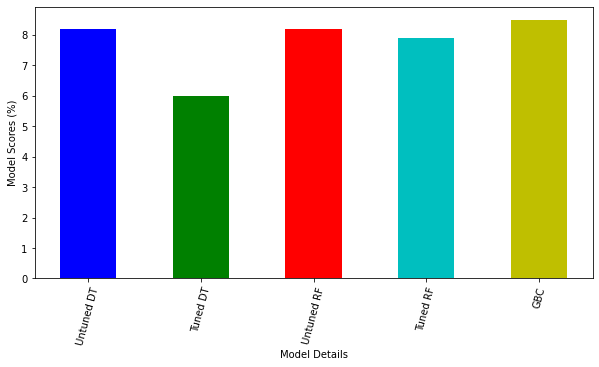

In [67]:
x = ['Untuned DT','Tuned DT','Untuned RF','Tuned RF', 'GBC']
y = [8.2, 6, 8.1, 7.8, 8.5]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'y'])
plt.ylabel('Model Scores (%)')
plt.xlabel('Model Details')
plt.xticks(rotation=75)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors), width = 0.5)
plt.show()

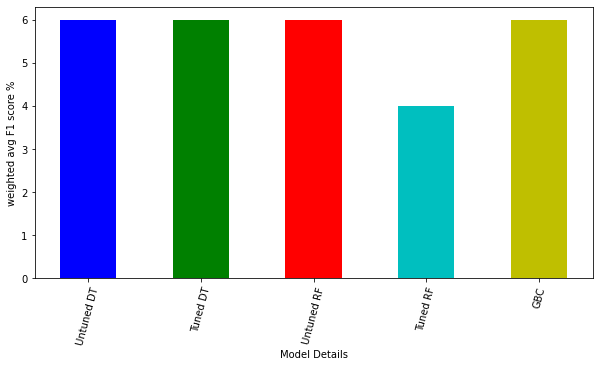

In [76]:
x = ['Untuned DT','Tuned DT','Untuned RF','Tuned RF', 'GBC']
y = [6, 6, 6, 4, 6]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'y'])
plt.ylabel('weighted avg F1 score %')
plt.xlabel('Model Details')
plt.xticks(rotation=75)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors), width = 0.5)
plt.show()

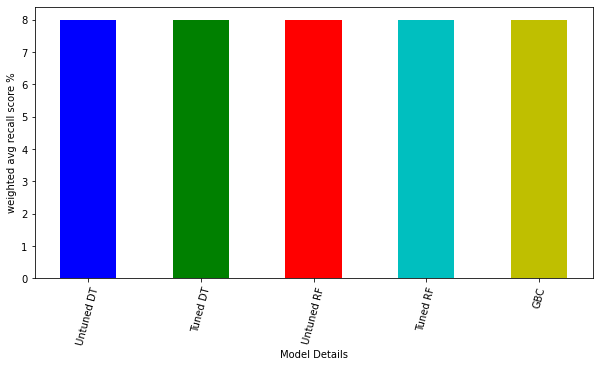

In [77]:
x = ['Untuned DT','Tuned DT','Untuned RF','Tuned RF', 'GBC']
y = [8, 8, 8, 8, 8]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'y'])
plt.ylabel('weighted avg recall score %')
plt.xlabel('Model Details')
plt.xticks(rotation=75)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors), width = 0.5)
plt.show()

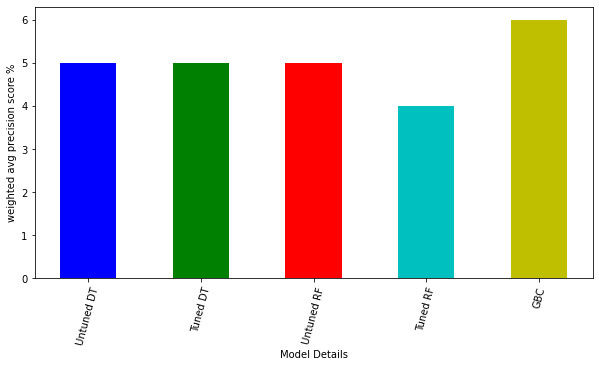

In [78]:
x = ['Untuned DT','Tuned DT','Untuned RF','Tuned RF', 'GBC']
y = [5, 5, 5, 4, 6]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'y'])
plt.ylabel('weighted avg precision score %')
plt.xlabel('Model Details')
plt.xticks(rotation=75)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors), width = 0.5)
plt.show()

# Future Enhancement

1. Feature engineering to bolster the number of features in the dataset
2. Augmenting the date-time column to potentially run a timeseries
